In [ ]:
!pip install git+https://github.com/btarun13/visibility_graph.git@new_build


In [2]:
import sys
import pandas as pd
import numpy as np
# sys.path.append("/Users/tarun/0_REPOS/visibility_graph/src/VisibilityGraph")
from VisibilityGraph import data_process
from VisibilityGraph import network_build
from VisibilityGraph import generate_graph
from VisibilityGraph import xgboost_model
from VisibilityGraph import strategy_back

df = pd.read_csv("/content/7.csv")
cols = ['high', 'open', 'close', 'low', 'amount', 'vol']
df_list,label_list = data_process.make_df_list(df,window = 40,k =5,col_types = cols)
tr_x,tr_y,ts_x,ts_y= data_process.make_train_valid(df_list,label_list,0.2)
feature_dimension = 64
num_layers = 3
pooling_method = "mean"



m = generate_graph.df_tensor_representation(ds=tr_x, window=40,
                             col_types = cols,
                             feature_dimension=64,
                             num_layers=num_layers, pooling_method="mean")

val_x = generate_graph.df_tensor_representation(ds=ts_x, window=40,
                                col_types = cols,
                                feature_dimension=64,
                                num_layers=num_layers, pooling_method="mean")
embedded_df = m
embedded_df['label'] = tr_y

mod = xgboost_model.emb_model_train(embedded_df,estimators=1000,lr=0.01,max_depth=100,
                                    obj='binary:logistic',eval_met='logloss',ts_size=0.3,random_state=23)

[0]	validation_0-logloss:0.67331
[1]	validation_0-logloss:0.67416
[2]	validation_0-logloss:0.67494
[3]	validation_0-logloss:0.67577
[4]	validation_0-logloss:0.67737
[5]	validation_0-logloss:0.67818
[6]	validation_0-logloss:0.67938
[7]	validation_0-logloss:0.67990
[8]	validation_0-logloss:0.68127
[9]	validation_0-logloss:0.68219
[10]	validation_0-logloss:0.68368
[11]	validation_0-logloss:0.68455
[12]	validation_0-logloss:0.68542
[13]	validation_0-logloss:0.68594
[14]	validation_0-logloss:0.68670
[15]	validation_0-logloss:0.68757
[16]	validation_0-logloss:0.68749
[17]	validation_0-logloss:0.68778
[18]	validation_0-logloss:0.68902
[19]	validation_0-logloss:0.68929
[20]	validation_0-logloss:0.68984
[21]	validation_0-logloss:0.69063
[22]	validation_0-logloss:0.69147
[23]	validation_0-logloss:0.69123
[24]	validation_0-logloss:0.69171
[25]	validation_0-logloss:0.69287
[26]	validation_0-logloss:0.69362
[27]	validation_0-logloss:0.69453
[28]	validation_0-logloss:0.69496
[29]	validation_0-loglos

Accuracy: 56.65%
              precision    recall  f1-score   support

           0       0.39      0.21      0.27       459
           1       0.61      0.79      0.69       729

    accuracy                           0.57      1188
   macro avg       0.50      0.50      0.48      1188
weighted avg       0.53      0.57      0.53      1188

[[ 96 363]
 [152 577]]


(array([1, 1, 1, ..., 1, 1, 1], shape=(1188,)),
 array([0.79352164, 0.9095899 , 0.63665164, ..., 0.67179805, 0.9106214 ,
        0.7571671 ], shape=(1188,), dtype=float32))

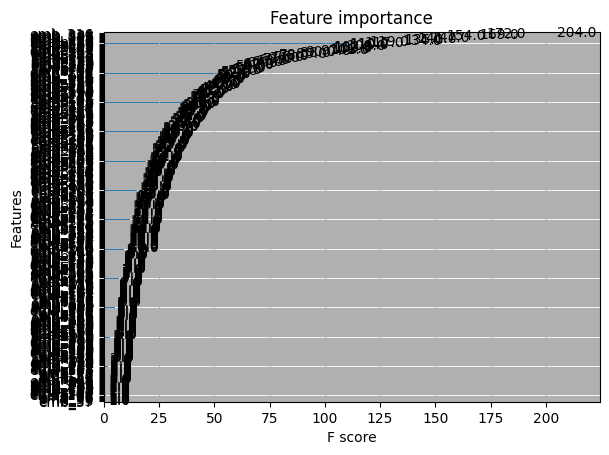

In [3]:
xgboost_model.predict(mod,val_x,ts_y)

100%|██████████| 1188/1188 [00:00<00:00, 4541.37it/s]


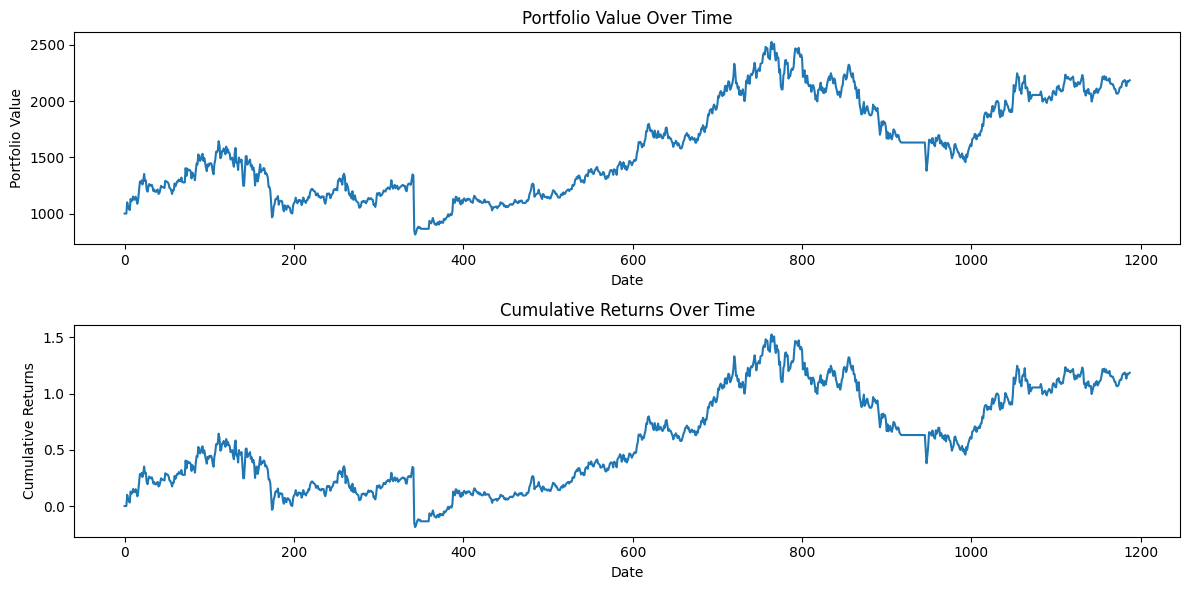

(       high   open  close    low      amount      vol  tag  position  \
 0     24.70  24.70  24.70  24.70           0        0    1         1   
 1     24.70  24.70  24.70  24.70           0        0    1         1   
 2     24.70  24.70  24.70  24.70           0        0    1         1   
 3     27.17  27.17  26.18  25.90  3634176768  1367359    0         0   
 4     26.48  26.30  25.86  25.51  1405624704   543456    0         0   
 ...     ...    ...    ...    ...         ...      ...  ...       ...   
 1183  53.65  52.70  53.48  52.70   968542656   181512    1         1   
 1184  54.16  53.78  53.94  53.50  1009190400   187410    1         1   
 1185  54.10  53.58  53.73  53.50   705748672   131210    1         1   
 1186  53.90  53.84  53.75  53.26   746186432   139076    1         1   
 1187  53.98  53.98  53.80  52.78   975561728   182031    1         1   
 
        returns  portfolio_value  cumulative_returns  
 0     0.000000      1000.000000            0.000000  
 1     0.000

In [4]:
k = xgboost_model.make_emb_valid(ts_x)
data = k.reset_index(drop=True)
data['tag'] =mod.predict(val_x)
strategy_back.backtest_buy_hold(data, initial_capital=1000)